Student Details

Name: **Chelliah Kanthanathan**

ID: **18263003**

All necessary imports are provided. Please do not add further imports.

In [44]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

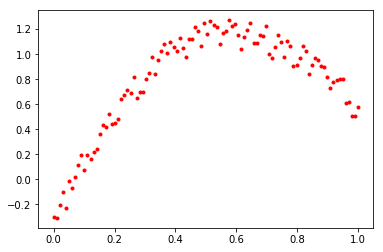

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target
orig_X = X
plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [9]:
ein=[]
eout=[]
weights=[]
#lambdas = np.linspace(0.001,1, 1000)
#lambdas = [10,5,2,1,0.9,0.8,0.7,0.6, 0.5,0.4,0.3,0.2,.1,0.01,.001]
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001] # 7 values
#lambdas = np.arange(0,1,0.001) # 1000 values 
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

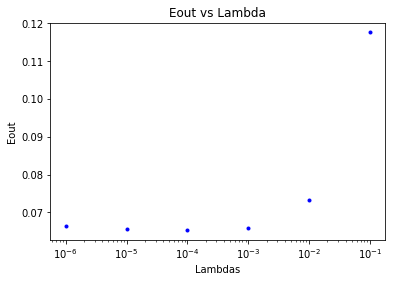

In [12]:
plt.plot(lambdas[1:],eout[1:],'b.')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.xscale('log')
plt.show()

#### It is evident that as lambda increases the in and out of sample errors increase. We need to find the sweet spot where as the  lambda does not result in overfitting or underfitting.

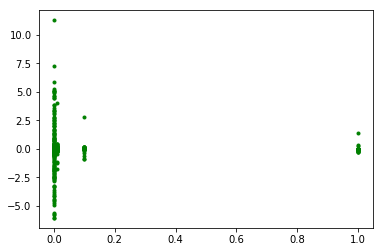

In [13]:
plt.plot(lambdas,weights,'g.')
plt.show()

#### Above plot confirms that as lambda increases the weight coefficient increases as well, In a way it shows that the regularization penalty is evident when lambda is near zero i.e. near zero does not make much difference in weight coefficient

### Find Optimal Lambda

In [14]:
min_eout_index = np.argmin(eout)
print ("Min_Eout_Index:", min_eout_index)
optimal_lambda = lambdas[min_eout_index]
print ("OPTIMAL LAMBDA:",optimal_lambda)

Min_Eout_Index: 4
OPTIMAL LAMBDA: 0.0001


### Task 4.1 - Compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [15]:
print('Eout with optimal lambda:',  eout[min_eout_index])
print('Eout with out regularization:',  eout[0])

Eout with optimal lambda: 0.06533076171525735
Eout with out regularization: 0.19142087008220465


#### It is obvious from above eout output that with out regularization the error is very high. This proves that regularization results in better lower error on prediction.

### Task 4.2 A plot showing the estimate of Eout vs lambda on the domain [0,1]


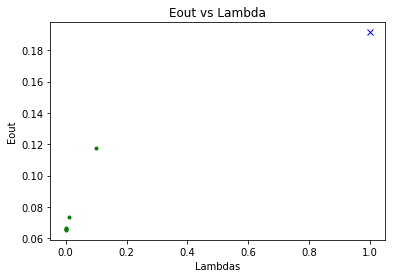

In [17]:
plt.plot(lambdas[0],eout[0],'bx')
plt.plot(lambdas[1:],eout[1:],'g.')
plt.title('Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.show()

#### Above plot concludes that eout without regularization resulted in high error blue X, where as with the regularization it resulted in low error green dots..

### Task 4.2 A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

In [18]:
 def calc_prediction(weights, X): 
    # Used code from Michel for plotting..Credit goes to him for plotting
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [23]:
def demonstrate_overfitting_and_underfitting(X,y,l):
    ein=[]
    eout=[]
    pred=[]

    X_trans = transPoly(X,50)
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    print (w)
    pred=calc_prediction(w,X)
    
    plt.plot(X, y, 'r.')
    plt.plot(X, pred , 'b-')
    plt.show()

[ 1.01113904e+01 -8.93947442e+02  1.32401033e+04 -8.05436774e+04
  2.06472113e+05  2.34423615e+05 -3.70176239e+06  1.39671372e+07
 -3.07287975e+07  4.45905132e+07 -4.33366278e+07  2.55470962e+07
 -4.62124858e+06 -3.86866815e+06 -1.89793803e+05  4.36601345e+06
 -3.72400010e+06  1.60155514e+06 -2.82770332e+05  9.19061215e+05
 -4.12831264e+05 -1.00474831e+06 -8.52950854e+05  1.43582531e+06
 -2.86605431e+05  2.91221278e+05  7.49244668e+05 -3.54035318e+05
 -2.71066164e+05 -2.72076104e+05  5.70475591e+05 -1.09534403e+06
 -1.62534237e+05  4.12149307e+05 -1.80240778e+05 -2.70478884e+05
  1.36107826e+06  6.29053601e+05  2.72245098e+05 -9.99695397e+05
 -1.30128485e+06  4.58159210e+05 -9.50540627e+05  1.31959571e+06
 -7.38682535e+04  6.06951441e+05 -5.64581143e+04 -6.12726286e+05
  1.69780593e+05 -1.47503676e+05  1.18793651e+05]


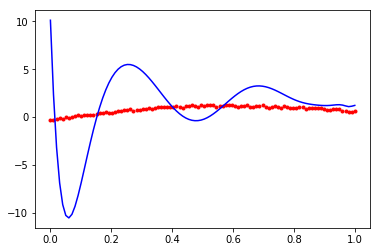

In [24]:
demonstrate_overfitting_and_underfitting(X,y,0)

[-0.30137343  4.63614929 -2.4601956  -1.18181234 -1.16835675 -0.68532837
  0.08304974  0.68802797  0.95067786  0.9011913   0.65173631  0.31884013
 -0.00846444 -0.27497561 -0.45465956 -0.54274953 -0.5480889  -0.4869615
 -0.37861722 -0.24228762 -0.09536729  0.04755634  0.17508973  0.27904059
  0.35419475  0.39796731  0.40999857  0.39174056  0.3460625   0.27689112
  0.18889373  0.08720651 -0.02279287 -0.13567121 -0.24608822 -0.34891181
 -0.43930487 -0.51278758 -0.56527931 -0.59312384 -0.5931007  -0.56242577
 -0.49874321 -0.4001109  -0.26498098 -0.09217695  0.11913158  0.36945544
  0.65901315  0.98775815  1.35540557]


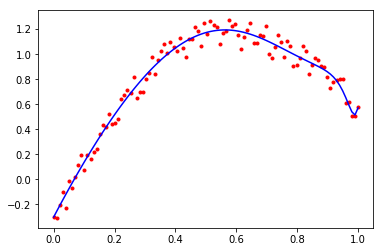

In [26]:
demonstrate_overfitting_and_underfitting(X,y,optimal_lambda)

[ 4.51922504e-01  4.94692603e-01  2.34116349e-01  9.13158850e-02
  1.78827684e-02 -1.97461590e-02 -3.86672742e-02 -4.75641108e-02
 -5.09826922e-02 -5.13801687e-02 -5.01216114e-02 -4.79818858e-02
 -4.54074552e-02 -4.26574804e-02 -3.98821003e-02 -3.71669746e-02
 -3.45591899e-02 -3.20826117e-02 -2.97471232e-02 -2.75542572e-02
 -2.55006594e-02 -2.35802322e-02 -2.17854617e-02 -2.01082377e-02
 -1.85403526e-02 -1.70737996e-02 -1.57009420e-02 -1.44146025e-02
 -1.32081007e-02 -1.20752604e-02 -1.10103962e-02 -1.00082913e-02
 -9.06416710e-03 -8.17365256e-03 -7.33275126e-03 -6.53781036e-03
 -5.78549059e-03 -5.07273829e-03 -4.39675955e-03 -3.75499633e-03
 -3.14510483e-03 -2.56493568e-03 -2.01251605e-03 -1.48603338e-03
 -9.83820779e-04 -5.04343722e-04 -4.61881110e-05  3.91950534e-04
  8.11276831e-04  1.21290435e-03  1.59786355e-03]


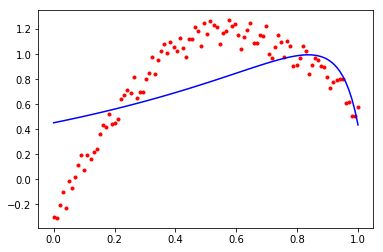

In [27]:
demonstrate_overfitting_and_underfitting(X,y,10)

### Task 5: Perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [32]:
# Cross validate on list of lambdas
def demonstrate_cross_validation(X,y,lambdas,num_folds=10):
    overall_eout=[]
    
    X_trans = transPoly(X,50)
    
    for lambd in lambdas:
        print("\nLambda: ",lambd)
        ein=[]
        eout=[]
        average_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        fold = 1
        for train_index, test_index in kf.split(X_trans):
            # Training data
            X_train_CV = X_trans[train_index]
            y_train_CV = y[train_index]
    
            # Testing data
            X_test_CV = X_trans[test_index]
            y_test_CV = y[test_index]
   
            w = weights_reg(X_train_CV,y_train_CV,lambd)
            ein.append(calc_error(w,X_train_CV,y_train_CV))
            local_eout = calc_error(w,X_test_CV,y_test_CV)
            eout.append(local_eout)
            print("K-Fold:", fold, ", Eout: ", local_eout)
            fold += 1
        
        average_eout = np.mean(eout)
        print("Average Eout: ",average_eout)
        overall_eout.append(average_eout)
    
    min_overall_eout_index = np.argmin(overall_eout)
    print ("min_overall_eout_index:", min_overall_eout_index)
    optimal_lambda_CV = lambdas[min_overall_eout_index]
    print ("\n\nOPTIMAL LAMBDA using K-Fold cross validation: {}".format(optimal_lambda_CV))

In [35]:
lambdas_cv = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
demonstrate_cross_validation(X,y,lambdas_cv) # Using original lambdas with 1000 values results in kernel crash..

print ("\nOPTIMAL LAMBDA without K-Fold cross validation: {}".format(optimal_lambda))


Lambda:  1
K-Fold: 1 , Eout:  0.1914208700822047
K-Fold: 2 , Eout:  0.18386117728502047
K-Fold: 3 , Eout:  0.15272231153815358
K-Fold: 4 , Eout:  0.17126455441650928
K-Fold: 5 , Eout:  0.18910481090041303
K-Fold: 6 , Eout:  0.151896793109436
K-Fold: 7 , Eout:  0.3495228986571694
K-Fold: 8 , Eout:  0.2623969996571222
K-Fold: 9 , Eout:  0.16136144065294475
K-Fold: 10 , Eout:  0.12268288144715403
Average Eout:  0.19362347377461275

Lambda:  0.1
K-Fold: 1 , Eout:  0.11750581000362474
K-Fold: 2 , Eout:  0.10013022657558021
K-Fold: 3 , Eout:  0.10308708785455466
K-Fold: 4 , Eout:  0.0955702888633925
K-Fold: 5 , Eout:  0.07720973234290386
K-Fold: 6 , Eout:  0.07362045981466825
K-Fold: 7 , Eout:  0.18532178127488774
K-Fold: 8 , Eout:  0.11885706458510782
K-Fold: 9 , Eout:  0.07878467066000935
K-Fold: 10 , Eout:  0.12603199981099045
Average Eout:  0.10761191217857195

Lambda:  0.01
K-Fold: 1 , Eout:  0.07331993412740138
K-Fold: 2 , Eout:  0.062322405401113494
K-Fold: 3 , Eout:  0.0715950522505

#### With K FOLD cross validation the optimal lambda is 0.00001 (i.e 1e-05) and with out K fold cross validation the optimal lambda is 0.0001. Slight variation in finding optimal lambda..

### Task 6 - Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected? Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

### RidgeCV performs L2 regularization

In [42]:
lambdas_RCV = np.arange(0, 1, 0.001)
#alpha = lambdas_RCV # 1000 values
alpha = lambdas # 7 values
fold = 10 # used 10 folds to compare cross validation with Task 5

clf_RCV = RidgeCV(alphas=alpha, cv=fold) #, normalize=True) # Try normalize

# Fit the Data
clf_RCV.fit(X_trans, y)

# Score and Prediction
score_RCV = clf_RCV.score(X_trans,y) 
predictions_RCV = clf_RCV.predict(X_trans)

print("\nregularization parameter", clf_RCV.alpha_)
print("\nscore :", score_RCV)
print("\nweight vector :", clf_RCV.coef_)


regularization parameter 0.01

score : 0.9734924784569552

weight vector : [ 0.00000000e+00  4.08932283e+00 -1.24803787e+00 -1.81023004e+00
 -1.16001260e+00 -4.57220705e-01  3.50582896e-02  3.14474647e-01
  4.37124034e-01  4.58864889e-01  4.21962433e-01  3.55091334e-01
  2.76461954e-01  1.96993721e-01  1.22792813e-01  5.69068240e-02
  5.07712393e-04 -4.63347002e-02 -8.41587631e-02 -1.13802704e-01
 -1.36217407e-01 -1.52356971e-01 -1.63118471e-01 -1.69312330e-01
 -1.71651237e-01 -1.70749961e-01 -1.67131164e-01 -1.61234202e-01
 -1.53425071e-01 -1.44006408e-01 -1.33226932e-01 -1.21290042e-01
 -1.08361416e-01 -9.45756307e-02 -8.00418241e-02 -6.48484969e-02
 -4.90675378e-02 -3.27575737e-02 -1.59667339e-02  1.26508407e-03
  1.89043724e-02  3.69225251e-02  5.52946482e-02  7.39986143e-02
  9.30143218e-02  1.12323119e-01  1.31907367e-01  1.51750107e-01
  1.71834821e-01  1.92145262e-01  2.12665337e-01]


#### The optimal lambda identified by RidgeCV is 0.01 thats is different from K Folds CV. The weight vector is same in size with the above methods that identified optimal lambda. RidgeCV used all the features as none of the weight coefficient is zero.

### LassoCV performs L1 regularization

In [45]:
lambdas_LCV = np.arange(0, 1, 0.001)
#alpha = lambdas_LCV # 1000 values
alpha = lambdas # 7 values
fold = 10 # used 10 folds to compare cross validation with Task 5

clf_LCV = LassoCV(alphas=alpha, cv=fold) #, normalize=True) # Try normalize

# Fit the Data
clf_LCV.fit(X_trans, y)

# Score and Prediction
score_LCV = clf_LCV.score(X_trans,y) 
predictions_LCV = clf_LCV.predict(X_trans)

print("\nregularization parameter", clf_LCV.alpha_)
print("\nscore :", score_LCV)
print("\nweight vector :", clf_LCV.coef_)


regularization parameter 1e-05

score : 0.9750333720698093

weight vector : [ 0.00000000e+00  4.90557719e+00 -2.94530361e+00 -1.62559941e+00
 -4.55770431e-01 -3.72872322e-03  2.83730117e-01  4.45486158e-01
  3.92131202e-01  2.99737554e-01  2.00135975e-01  1.08272080e-01
  3.09913676e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.28225224e-02 -1.53355294e-01
 -1.53678326e-01 -1.50337921e-01 -1.44161510e-01 -1.35337941e-01
 -1.24850145e-01 -1.13235870e-01 -1.00463700e-01 -8.70207382e-02
 -7.29766385e-02 -5.88468033e-02 -4.45280111e-02 -2.99023663e-02
 -1.56688930e-02 -1.35612619e-03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.28140237e-01
  1.72276716e-01  1.81248640e-01  1.89808869e-01]


#### The optimal lambda identified by LassoCV is 0.00001 that is exactly same as in K Folds CV. The weight coefficient have exactly zero, Out of 50 features only 31 features was selected. The weight coefficient for 19 features are zero. This shows that the LassoCV  excluded 19 features.